In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, Input, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [105]:
max_words = 10000

In [106]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [109]:
max_len = 200

In [110]:
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

In [121]:
l2_regularizer_rate = 0.005
model = Sequential([
    Input(shape=(max_len, )),
    Embedding(max_words, 2, embeddings_regularizer=l2(l2_regularizer_rate)),
    Dropout(0.3),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       AUC(name='AUC_ROC', curve='ROC'),
                       AUC(name='auc_pr', curve='PR')])


In [122]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=45,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - AUC_ROC: 0.5089 - accuracy: 0.5058 - auc_pr: 0.5073 - loss: 0.7185 - val_AUC_ROC: 0.5375 - val_accuracy: 0.5276 - val_auc_pr: 0.5213 - val_loss: 0.6939
Epoch 2/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC_ROC: 0.5970 - accuracy: 0.5705 - auc_pr: 0.5774 - loss: 0.6906 - val_AUC_ROC: 0.7344 - val_accuracy: 0.6736 - val_auc_pr: 0.6922 - val_loss: 0.6648
Epoch 3/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC_ROC: 0.7737 - accuracy: 0.7039 - auc_pr: 0.7557 - loss: 0.6412 - val_AUC_ROC: 0.8574 - val_accuracy: 0.7748 - val_auc_pr: 0.8554 - val_loss: 0.5732
Epoch 4/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC_ROC: 0.8637 - accuracy: 0.7848 - auc_pr: 0.8604 - loss: 0.5601 - val_AUC_ROC: 0.8870 - val_accuracy: 0.8088 - val_auc_pr: 0.8845 - val_loss: 0.5275
Epoch 5/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC_ROC: 0.8890 - accuracy: 0.8060 - auc_pr: 0.8885 - loss: 0.5214 - val_AUC_ROC: 0.8978 - val_accuracy: 0.8220 - val_auc

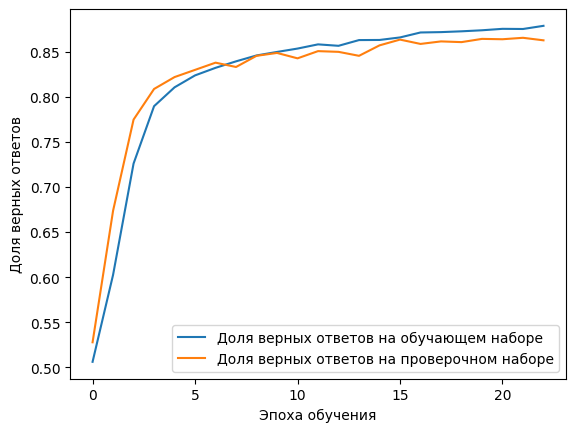

In [123]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [124]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC_ROC: 0.9408 - accuracy: 0.8690 - auc_pr: 0.9373 - loss: 0.4001


In [125]:
embedding_matrix = model.layers[0].get_weights()[0]

In [126]:
embedding_matrix[:5]

array([[-5.3846496e-03,  2.9778022e-03],
       [ 3.4611963e-02,  5.7859648e-02],
       [ 1.3666835e-02,  6.2966212e-03],
       [-3.5498814e-40,  5.4349361e-41],
       [-9.2721032e-03, -1.0642972e-02]], dtype=float32)

In [127]:
word_index_org = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [128]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2
word_index["<Не используется>"] = 3

In [129]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [-0.06547222 -0.06856732]


In [130]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [132]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.13575059, -0.13952628],
       [-0.13503686, -0.14204259],
       [-0.18861859, -0.18024397],
       [-0.06547222, -0.06856732],
       [ 0.2664036 ,  0.23969607],
       [ 0.30635658,  0.3085593 ],
       [ 0.13647252,  0.14782861],
       [ 0.22159031,  0.21993229],
       [ 0.05709602,  0.06097861]], dtype=float32)

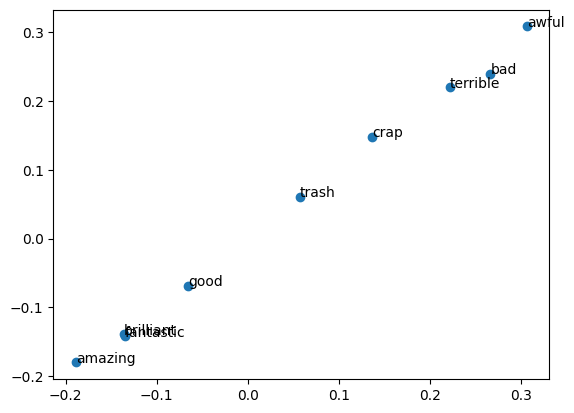

In [133]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))